<a href="https://colab.research.google.com/github/Gialbo/COVID-Chest-X-Rays-Deep-Learning-analysis/blob/main/experiments/covidUnetGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data

In [ ]:
# IMPORT AND MOUNT DRIVE
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path
import sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CLONE GITHUB REPOSITORY
!rm -r "COVID-Chest-X-Rays-Deep-Learning-analysis"
!git clone https://github.com/Gialbo/COVID-Chest-X-Rays-Deep-Learning-analysis.git

Cloning into 'COVID-Chest-X-Rays-Deep-Learning-analysis'...
remote: Enumerating objects: 875, done.
remote: Counting objects: 100% (286/286), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 875 (delta 179), reused 143 (delta 63), pack-reused 589
Receiving objects: 100% (875/875), 94.21 MiB | 28.31 MiB/s, done.
Resolving deltas: 100% (442/442), done.


In [ ]:
# LOAD DIRECTORIES
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/models')
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/tools')

In [ ]:
# LOAD TRAINING DATA

from XRaysDataset import XRaysDataset

dataset = XRaysDataset(batch_size=64)
train_datasets, training_size = dataset.load()

Dataset size  3443
Number of batches for the covid dataset: 17
Number of batches for the normal dataset: 17
Number of batches for the viral pneumonia dataset: 17


# Training

In [ ]:
#LOAD MODEL
from covidUnetGAN import covidUnetGAN

In [ ]:
# set checkpoint directory
checkpoint_dir = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/covidUnetGAN'
out_images_path = '/content/drive/MyDrive/BIOINF/checkpoints_GAN/covidUnetGAN/outImages'


covidUnetGAN = covidUnetGAN(batch_size=64,
                  checkpoint_dir=checkpoint_dir,
                  out_images_path=out_images_path,
                  discriminator_lr=8e-5,
                  n_epochs=400)

# noise used during training in order to evaluate how the network is learning
benchmark_noise = tf.random.normal([covidUnetGAN.batch_size, covidUnetGAN.latent_size])

#train model
covidUnetGAN.train_model(train_datasets[0], training_size, benchmark_noise)

# Results

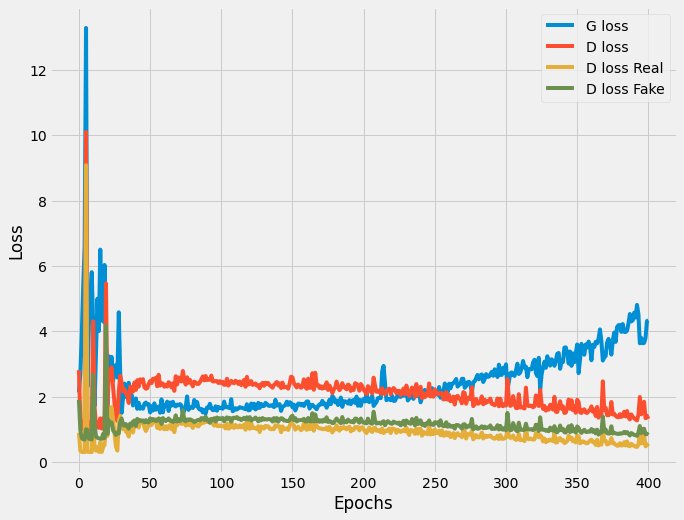

In [ ]:
with plt.style.context('fivethirtyeight'):
  covidUnetGAN.plot_losses(covidUnetGAN.history, "Epochs", "Loss")

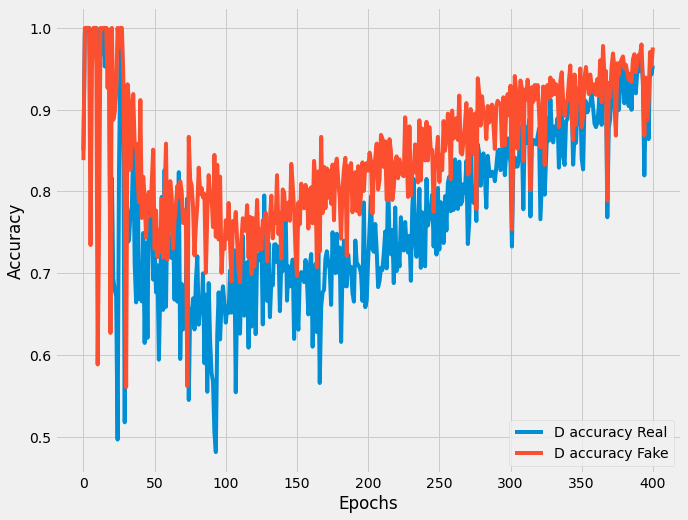

In [ ]:
with plt.style.context('fivethirtyeight'):
  covidUnetGAN.plot_losses(covidUnetGAN.accuracy, "Epochs", "Accuracy")

In [ ]:
from images_to_gif import images_to_gif

images_to_gif('/content/drive/MyDrive/BIOINF/checkpoints_GAN/covidUnetGAN/outImages/generated_at_*.png', '/content/drive/MyDrive/BIOINF/checkpoints_GAN/covidUnetGAN/outImages/covidUnetGAN_gen.gif')

images_to_gif('/content/drive/MyDrive/BIOINF/checkpoints_GAN/covidUnetGAN/outImages/decoded_at_*.png', '/content/drive/MyDrive/BIOINF/checkpoints_GAN/covidUnetGAN/outImages/covidUnetGAN_dec.gif')